<a href="https://colab.research.google.com/github/shakshisinghai/Genetic_Algo_Projects/blob/master/Bottle_genetic_algo_Pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import random

In [ ]:
from google.colab import files
files.upload() 

Saving bottle.png to bottle.png


{'bottle.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xd8\x00\x00\x00\xe9\x08\x03\x00\x00\x00q\xd8\t\xd7\x00\x00\x00\x90PLTE\xff\xff\xff%#$$$$\x00\x00\x00\xfc\xfc\xfc\x89\x89\x89"""\xf7\xf7\xf7\x1e\x1e\x1e\r\r\r&&&VVV*()" !***\xc6\xc6\xc6omn\xef\xee\xefhfg\x17\x17\x17\x05\x00\x04\xc1\xbf\xc0\xdd\xdb\xdc\x95\x95\x95\x84\x84\x84DDD\x13\x13\x13000\xe4\xe4\xe4\xec\xec\xecvvv\xaf\xaf\xaf\xa3\xa3\xa3\xd3\xd3\xd3===\x9b\x9b\x9b\xc4\xc4\xc4\xb7\xb7\xb7~~~UUU\xb1\xb1\xb1LLL\x8f\x8f\x8f___\xa6\xa6\xa6III444\x88\x86\x87t\x7f\x18r\x00\x00\r\x12IDATx\x9c\xed\x9d\r{\xa2\xbc\x12\x86#\t$A\r"\xcb\x87\x84O\x11T\xb4\xf6\xff\xff\xbb3A\xdb\xddn\xddJ\xb7\xef\xaeqO\x9e\xab\xf5j\x11473\x99d\x92\x00\x08\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19\x19}A\xe4\xf5\x0fz\x16!\x1f\xed\xfeH\xf2\xb3\xc8\x0bwM\xff\xfc\x9ctI\xf2\xfc\xfc|,C/\xca\xfc\xc7\x06\xf4\xcbx\xb1]\x9d\xac\xe0\x1b\xe6,H\x03%\x1e\xccNO\xdbe_f\xf7.\xdd\x17\xf4\xcc\xf8\xb7t&\'\xb3\x99\x90r\x06r\'\xb3\x

In [ ]:
!ls


bottle.png  sample_data


In [ ]:
#Changing colour of image to Gray scale
def to_gray(image):
  image = tf.image.rgb_to_grayscale(image)
  image= np.array(image).reshape(img_size, img_size,1)
  return image

(50, 50) (50,)


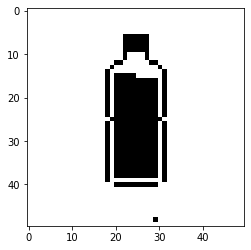

In [ ]:
img_size=50
pop_size=50
generations= 500
pxl=1
mutate_value=30
kill_rate=2
image = tf.image.decode_jpeg(tf.io.read_file('./bottle.png'))
image=tf.image.resize(image, [img_size, img_size])
image=to_gray(image)


image=image.reshape(img_size, img_size)
image= list(map(lambda img: list(map(lambda i: round((i/255)*pxl) , img)), image))
image=np.array(image)
print(image.shape, image[0].shape)
plt.imshow(image.reshape(img_size,img_size), cmap="gray")



In [ ]:
def generate_population(pop_size, img_size):
  pop=[]
  for s in range(pop_size):
    population=[]
    for i in range(img_size):
      for j in range(img_size):
        population.append(random.randint(0,pxl))
    population= np.array(population).reshape(img_size, img_size)
    pop=np.append(pop ,([0,population]))
  return pop

def fitness_func(img_member):
  #print("fitness start")
  global image
  img_member=img_member[1]
  #print(img_member.shape, image.shape)
  image=image.reshape(img_size, img_size)
  scorex, scorey=0,0
  for x in range(img_size):
    for y in range(img_size):
      if x>(img_size/3) and x<(img_size/3+img_size/3)
      s=(pxl-abs(img_member[x][y]-image[x][y]))
      #print("score:",s, pxl, abs(img_member[x][y]-image[x][y]))
      scorex+=s
  #print("fitness end")
  return [(scorex), img_member]


def cross_breed(member1, member2):
  #print("cb start")
  member1=member1[1]
  member2=member2[1]
  split_index_x= random.randint(0, img_size-1)
  new_member1=np.append(member1[:,:split_index_x],member2[:, split_index_x : ],1)
  new_member2= np.append(member2[:,:split_index_x],member1 [:, split_index_x : ],1)
  return [[0,new_member1], [0,new_member2]]

def mutate(member):
  #print("mutate start")
  member=member[1]
  for i in range(mutate_value):
    mutate_index_x = random.randint(0,img_size-1)
    mutate_index_y = random.randint(0,img_size-1)
    value=random.randint(0,pxl)
    member[mutate_index_x][mutate_index_y]=value
  #print("mutate end")
  return [0,member]
        

<class 'numpy.ndarray'> (50, 2) (50, 50)
Generation  0
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1314.0 1179.0
<class 'numpy.ndarray'> int64
Generation  1
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1310.0 1238.0
<class 'numpy.ndarray'> int64
Generation  2
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1322.0 1245.0
<class 'numpy.ndarray'> int64
Generation  3
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1323.0 1257.0
<class 'numpy.ndarray'> int64
Generation  4
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1331.0 1270.0
<class 'numpy.ndarray'> int64
Generation  5
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1331.0 1297.0
<class 'numpy.ndarray'> int64
Generation  6
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1333.0 1293.0
<class 'numpy.ndarray'> int64
Generation  7
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1344.0 1301.0
<class 'numpy.ndarray'> int64
Generation  8
<

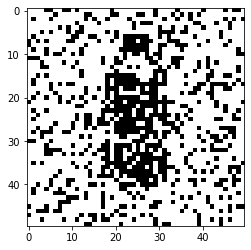

In [ ]:


population=generate_population(pop_size,img_size)
population=population.reshape(pop_size,2)
print(type(population),population.shape, population[1][1].shape)

maxscore, minscore=[],[]
#print(population)
for i in range(generations):
  j=0
  print("Generation ", i)
  print(type(population[0][1]), population[0][1].dtype)
  population=list(map(lambda ps: fitness_func(ps), population))
  population=(sorted(population, key=lambda a: a[0]))
  print(type(population[0][1]), population[0][1].dtype)
  maxscore.append(population[-1][0])
  minscore.append(population[0][0])
  #print("fit end")
  print(population[-1][0], population[0][0])
  population=population[pop_size//kill_rate:]
  popl=len(population)
  #print("cb start")
  while len(population)<pop_size:
    population.extend(cross_breed(population[random.randint(0,popl-1)], population[random.randint(0,popl-1)]))
  #print("cb end")
  print(type(population[0][1]), population[0][1].dtype)
  for i, member in enumerate(population):
    if (random.random()<0.5):
      population[i]=mutate(member)
  #print("m end")


plt.imshow(population[0][1], cmap="gray")


In [ ]:
population[0][1][4][5]=1

In [ ]:
print(maxscore, minscore)

[590.1] [578.88]


TypeError: ignored

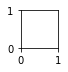

In [ ]:

n=5
j=1
rand=[random.randint(1,pop_size-1) for i in range(5)]
for i in rand:
  plt.subplot(n,n,j)
  plt.imshow(population[i][1], cmap="gray")
  plt.xticks([], [])
  plt.yticks([], [])
  j+=1

plt.tight_layout()

print(type(population), population[0][1].shape)
#plt.imshow(population[0][1])

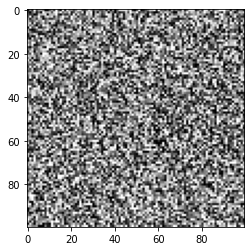

In [ ]:
 plt.imshow(population[0][1], cmap="gray")